# Dependencias

In [ ]:
import pandas as pd
import json
import fitz

# 1. Extracción y Preparación del Corpus:

## 1.1. Extraer las secciones

In [ ]:
# Cargar datos de los testimonios
with open('../data/input/entrevistas_all_2023-03-21_14-24_05.json', 'r') as file:
    data = json.load(file)
df_testimonios = pd.DataFrame(data)
df_testimonios.head(3)

,id_doc,pages,text
0,5eb4e7bfda6da3b502da3589.pdf,30,001-VI-00008\nTEST: Bajo la apariencia de una...
1,5eb4e7c0da6da3b502da358e.pdf,30,001-VI-00008\nTEST: Bajo la apariencia de una...
2,5eb4e7c1da6da3b502da3593.pdf,15,"ENT:\nBueno, hoy es --------------------------..."


In [ ]:
df_testimonios.shape

(2486, 3)

In [ ]:
#Leer PDF de la seccion - GRUPO 5 - CEV_MI CUERPO ES LA VERDAD_DIGITAL_2022

# desde qué página empezar
desde = 29
# abrir el PDF
with fitz.open('../data/input/CEV_MI CUERPO ES LA VERDAD_DIGITAL_2022.pdf') as doc:
    # opcional: validar rango
    desde = max(0, min(desde, len(doc)-1))
    texto = []
    for i in range(desde, len(doc)):
        page = doc[i]
        texto.append(page.get_text())
    texto_pdf = "\n".join(texto)

In [ ]:
print(texto_pdf[:1000])

mi cuerpo es la verdad
30
¿Por qué esta sección acerca  
de las mujeres?
L
a primera sección de este tomo, que retrata lo que les pasó a millones de 
mujeres en el conflicto armado colombiano, es una invitación a esclarecer la 
verdad, a reconocerse en lo que ellas vivieron, y en lo que no puede volver a 
suceder. Con ello se cumple el mandato de la Comisión de la Verdad en lo que con-
cierne a «esclarecer y promover el reconocimiento del impacto humano y social del 
conflicto en la sociedad [...] incluyendo las formas diferenciadas en las que el conflicto 
afectó a las mujeres»2. Asimismo, es el resultado de la insistencia y persistencia de las 
organizaciones de mujeres víctimas y feministas, que al unísono proclamaron: «Sin la 
voz de las mujeres la verdad no está completa». 
En consecuencia, aquí se muestran los actos intolerables que sufrieron las 10.864 
mujeres escuchadas por la Comisión3; algo que como sociedad no debimos permitir. 
La Comisión creyó en su palabra, dio valor a 

# Libro

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.9 MB/s eta 0:00:00


## Extración texto

In [ ]:
import PyPDF2

# Ruta del archivo
pdf_path = "/content/CEV_MI CUERPO ES LA VERDAD_DIGITAL_2022.pdf"

# Abrir el archivo en modo binario
with open(pdf_path, "rb") as file:
    reader = PyPDF2.PdfReader(file)

    # Extraer texto de todas las páginas
    text = ""
    for page in reader.pages:
        text += page.extract_text() + "\n"

# Guardar en una variable
pdf_text = text

print(pdf_text[:1000])  # Muestra los primeros 1000 caracteres


  
MI CUERPO
ES LA VERDAD
Experiencias de mujeres y personas LGBTIQ+ 
en el conflicto armadoHAY FUTURO 
si hay verdad
INFORME FINAL
Comisión para el Esclarecimieto 
de la Verdad, la Convivencia  
y la No RepeticiónMI CUERPO ES LA VERDAD
Experiencias de mujeres y personas LGBTIQ+ 
en el conflicto armado

HAY FUTURO 
si hay verdad
INFORME FINAL
MI CUERPO  
ES LA VERDAD
EXPERIENCIAS DE MUJERES  
Y PERSONAS LGBTIQ+ 
EN EL CONFLICTO ARMADO
Colombia. Comisión de la Verdad, autor
Hay futuro si hay verdad : Informe Final de la Comisión para el Esclarecimiento de la 
Verdad, la Convivencia y la No Repetición. -- Primera edición. -- Bogotá : Comisión de 
la Verdad, 2022.
11 tomos en 24 volúmenes : ilustraciones, diagramas, fotografías y mapas a color.
Incluye referencias bibliográficas
ISBN 78-958-53874-3-0 (Obra completa impreso)
ISBN 978-628-7590-00-7 (Tomo 7 impreso) 
ISBN 978-628-7590-18-2 (Obra completa digital)
ISBN 978-628-7590-28-1 (Tomo 7 digital)  
T omo 1. Convocatoria a la paz grande

## Guardar texto en Dataframe por secciones

In [ ]:
# -*- coding: utf-8 -*-
import re
import pandas as pd
import PyPDF2

# ============ Config ============
pdf_path = "/content/CEV_MI CUERPO ES LA VERDAD_DIGITAL_2022.pdf"  # cambia la ruta si es necesario
START_AFTER_PAGE_1BASED = 37  # empezar DESPUÉS de esta página (1-based)
# ===============================

# -------- Utils: lectura y normalización --------
def read_from_page(path, start_after_page_1based: int) -> str:
    """Lee el PDF desde la página siguiente a start_after_page_1based (1-based)."""
    start_idx = max(start_after_page_1based, 1)  # p.ej. 37
    start_idx0 = start_idx  # queremos DESPUÉS => iniciar en 38 (índice base-1 == 37)
    text_pages = []
    with open(path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        start_idx0 = min(start_idx0, len(reader.pages))
        for i in range(start_idx0, len(reader.pages)):
            try:
                t = reader.pages[i].extract_text() or ""
            except Exception:
                t = ""
            text_pages.append(t)
    return "\n".join(text_pages)

def normalize_text(txt: str) -> str:
    # Une palabras cortadas por salto de línea: "muje-\nres" -> "mujeres"
    txt = re.sub(r"(\w)-\n(\w)", r"\1\2", txt)
    # Homogeneiza saltos/espacios
    txt = txt.replace("\r", "\n")
    txt = re.sub(r"[ \t]+", " ", txt)
    txt = re.sub(r"\n{3,}", "\n\n", txt)
    return txt.strip()

def make_pattern(title: str) -> re.Pattern:
    """
    Regex robusto para encontrar títulos:
    - Insensible a mayúsculas/minúsculas
    - Tolera múltiples espacios/saltos entre palabras
    - Tolera espacios alrededor de ':'
    """
    parts = []
    for ch in title.strip():
        if ch.isspace():
            parts.append(r"\s+")
        else:
            parts.append(re.escape(ch))
    pat = "".join(parts).replace(r"\:", r"\s*:\s*")
    return re.compile(pat, flags=re.IGNORECASE | re.DOTALL)

def find_once(txt: str, title: str):
    m = make_pattern(title).search(txt)
    return m.start() if m else None

def slice_after_heading(txt: str, start_pos: int, end_pos: int, heading_title: str) -> str:
    """Devuelve el contenido de la sección SIN el rótulo del encabezado."""
    chunk = txt[start_pos:end_pos]
    m = make_pattern(heading_title).search(chunk)
    if m and m.start() <= 5:
        return chunk[m.end():].lstrip()
    return chunk.strip()

# -------- Esquema exacto que pediste --------
schema = {
    "Mujeres": {
        "¿Qué pasó? Significados y  magnitudes de lo sucedido": [
            "La guerra, el territorio y las mujeres",
            "Las violencias sexuales y reproductivas contra niñas y mujeres",
            "Mujeres políticas expulsadas de la democracia",
            "Las mujeres en la guerra: vinculación e impactos en sus vidas y en sus familias",
        ],
        "¿Por qué pasó? Dimensiones del patriarcado": [
            "El contínuum de violencias, una realidad que cambia pero no desaparece",
            "El mandato de las masculinidades guerreras y su relación con el militarismo",
            "La desprotección por parte del Estado en zonas de conflicto",
        ],
        "¿Qué pasó con lo que pasó?": [
            "Impactos del conflicto armado en las mujeres",
            "Afrontamientos de las mujeres víctimas",
            "Resistencias, juntanza y organización: en las mujeres reposa la fuerza de la comunidad",
        ],
        "_end_before": "Epílogo",
        "_boundaries": [
            "¿Por qué pasó? Dimensiones del patriarcado",
            "¿Qué pasó con lo que pasó?",
        ],
    },
    "LGBTIQ+": {
        "¿Qué pasó? Violencias contra las personas LGBTIQ+ en el marco del conflicto armado colombiano": [
            "Una mirada general a las violencias contra las personas LGBTIQ+ en la guerra",
            "Situaciones territoriales ilustrativas de la persecución contra personas LGBTIQ+ en el marco del conflicto armado",
            "La persecución contra personas LGBTIQ+ en el conflicto armado colombiano",
            "Patrones de persecución contra las personas LGBTIQ+ diferenciados según el actor armado",
            "Otras consideraciones",
        ],
        "Los porqués de la persecución contra personas LGBTIQ+": [
            "La herencia colonial como un factor histórico explicativo",
            "Factores socioculturales",
            "Factores institucionales y políticos",
        ],
        "¿Qué pasó con lo que les pasó a las personas LGBTIQ+ en el marco del conflicto armado colombiano?": [
            "Impactos de las violencias contra personas LGBTIQ+",
            "Afrontamientos de personas LGBTIQ+ víctimas del conflicto armado en Colombia",
            "Cuerpos disidentes que resisten y transforman para la paz",
        ],
        "_end_before": "Conclusiones",
        "_boundaries": [
            "Los porqués de la persecución contra personas LGBTIQ+",
            "¿Qué pasó con lo que les pasó a las personas LGBTIQ+ en el marco del conflicto armado colombiano?",
        ],
    },
}




In [ ]:
# === Extracción ORDENADA por schema -> DataFrame ===

# 0) Leer texto desde después de la página 37 y normalizar
raw_text = read_from_page(pdf_path, START_AFTER_PAGE_1BASED)
text = normalize_text(raw_text)

# 1) Recolectar TODAS las anclas en el MISMO ORDEN del schema
def collect_anchor_titles(schema):
    ordered = []
    for top in ["Mujeres", "LGBTIQ+"]:
        # límites de cierre y boundaries (necesarios para cortar)
        ordered.append(schema[top]["_end_before"])
        ordered.extend(schema[top]["_boundaries"])
        # segundo nivel y sus tercer niveles en orden
        for lvl2, lvl3_list in schema[top].items():
            if lvl2.startswith("_"):
                continue
            ordered.append(lvl2)
            ordered.extend(lvl3_list)
    # quitar duplicados preservando el orden
    seen, out = set(), []
    for t in ordered:
        if t not in seen:
            seen.add(t)
            out.append(t)
    return out

anchor_titles = collect_anchor_titles(schema)

# 2) Indexar posiciones (algunas pueden no encontrarse)
title2pos = {}
missing_anchors = []
for t in anchor_titles:
    p = find_once(text, t)
    if p is None:
        missing_anchors.append(t)
    else:
        title2pos[t] = p

# Lista ordenada de posiciones para hallar el "siguiente ancla" en el documento
all_positions_sorted = sorted(title2pos.values())

def next_end_pos(start_pos: int) -> int:
    """Devuelve la posición del siguiente ancla después de start_pos."""
    for p in all_positions_sorted:
        if p > start_pos:
            return p
    return len(text)

# 3) Recorrer el SCHEMA en orden y cortar cada tercer nivel hasta el siguiente ancla
rows = []
for top in ["Mujeres", "LGBTIQ+"]:
    lvl2_order = [k for k in schema[top].keys() if not k.startswith("_")]
    for lvl2 in lvl2_order:
        for lvl3 in schema[top][lvl2]:
            start = title2pos.get(lvl3)
            if start is None:
                # No se encontró el título; dejamos contenido vacío para mantener el ORDEN
                content = ""
            else:
                end = next_end_pos(start)
                content = slice_after_heading(text, start, end, lvl3)

                # Protección extra por si aparece el cierre dentro del bloque:
                end_before = schema[top]["_end_before"]
                cut_inside = find_once(content, end_before)
                if cut_inside is not None:
                    content = content[:cut_inside].rstrip()

            rows.append({
                "seccion": top,
                "seccion_principal": lvl2,
                "subseccion": lvl3,
                "contenido": (content or "").strip()
            })






In [ ]:
# 4) DataFrame final en el ORDEN del schema
import pandas as pd
df = pd.DataFrame(rows, columns=["seccion", "seccion_principal", "subseccion", "contenido"])

# (Opcional) filtrar filas sin contenido real
# df = df[df["contenido"].str.len() > 0].reset_index(drop=True)

print(f"Filas en DataFrame: {len(df)}")
if missing_anchors:
    print("\n⚠️ Anclas no encontradas (revisa ortografía/espacios en el PDF):")
    for t in missing_anchors:
        print(" -", t)

Filas en DataFrame: 21

⚠️ Anclas no encontradas (revisa ortografía/espacios en el PDF):
 - ¿Qué pasó? Significados y  magnitudes de lo sucedido


In [ ]:
# Vista rápida
df.head(20)

,seccion,seccion_principal,subseccion,contenido
0,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,"La guerra, el territorio y las mujeres",Las mujeres viven la guerra en sus territorios...
1,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las violencias sexuales y reproductivas contra...,Duele la lengua rota. \n¿Dónde está mi femenin...
2,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Mujeres políticas expulsadas de la democracia,».\n¿qué pasó? significados y magnitudes de lo...
3,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las mujeres en la guerra: vinculación e impact...,Para algunas mujeres campesinas y de las clase...
4,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,"El contínuum de violencias, una realidad que c...",El contínuum se refiere a la persistencia de l...
5,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,El mandato de las masculinidades guerreras y s...,El concepto de masculinidades guerreras alude ...
6,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,La desprotección por parte del Estado en zonas...,Colombia es un país profundamente desigual en ...
7,Mujeres,¿Qué pasó con lo que pasó?,Impactos del conflicto armado en las mujeres,fueron desproporcionados justamente \npor la e...
8,Mujeres,¿Qué pasó con lo que pasó?,Afrontamientos de las mujeres víctimas,Resistir en medio de la guerra es trabajo de l...
9,Mujeres,¿Qué pasó con lo que pasó?,"Resistencias, juntanza y organización: en las ...",Las mujeres víctimas en Colombia se han sobrep...


In [ ]:
print(df.loc[2, "contenido"])

».
¿qué pasó? significados y magnitudes de lo sucedido67el Incora les estaba titulando las tierras a las mujeres, les decían que tenían que salirse 
de ahí y, si no, ya sabían. Amenazaban con matarles los hijos. Eso fue por ahí por La 
Cantillera; también en Cubará y en Galapa»73.
Huir para prevenir la violencia sexual contra sus hijas
La historia de Blanca, campesina del Sumapaz, es como la de otras mujeres que salieron de sus hogares para prevenir la violencia sexual por parte de los actores armados 
hacia sus hijas: 
A su hija Clara, un soldado la estaba persuadiendo, intentando enamorarla y 
pidiendo favores; a otras niñitas de la escuela también. Ya era un riesgo que anduvieran solas por caminos tan distantes, y cuando había negativa de parte de ellas a 
sus peticiones, el maltrato de esos atarbanes no se daba a esperar. Blanquita temía 
perder también a su hija. A esa mujer día a día la intranquilidad por sus hijas la 
hacía olvidarse de sí misma, en especial de su salud [...]. O

In [ ]:
df.head(20)

,seccion,seccion_principal,subseccion,contenido,n_caracteres
0,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,"La guerra, el territorio y las mujeres",Las mujeres viven la guerra en sus territorios...,70686
1,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las violencias sexuales y reproductivas contra...,Duele la lengua rota. \n¿Dónde está mi femenin...,139098
2,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Mujeres políticas expulsadas de la democracia,».\n¿qué pasó? significados y magnitudes de lo...,98574
3,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las mujeres en la guerra: vinculación e impact...,Para algunas mujeres campesinas y de las clase...,38915
4,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,"El contínuum de violencias, una realidad que c...",El contínuum se refiere a la persistencia de l...,20979
5,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,El mandato de las masculinidades guerreras y s...,El concepto de masculinidades guerreras alude ...,28003
6,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,La desprotección por parte del Estado en zonas...,Colombia es un país profundamente desigual en ...,35076
7,Mujeres,¿Qué pasó con lo que pasó?,Impactos del conflicto armado en las mujeres,fueron desproporcionados justamente \npor la e...,3325
8,Mujeres,¿Qué pasó con lo que pasó?,Afrontamientos de las mujeres víctimas,Resistir en medio de la guerra es trabajo de l...,32878
9,Mujeres,¿Qué pasó con lo que pasó?,"Resistencias, juntanza y organización: en las ...",Las mujeres víctimas en Colombia se han sobrep...,74522


## Conteo de palabras y cacaracteres

In [ ]:
# Conteo de palabras por fila
import re
import numpy as np
import matplotlib.pyplot as plt

def contar_palabras(texto: str) -> int:
    # Cuenta tokens alfanuméricos (incluye acentos) usando regex Unicode
    if texto is None or (isinstance(texto, float) and np.isnan(texto)):
        return 0
    tokens = re.findall(r"\b\w+\b", str(texto), flags=re.UNICODE)
    return len(tokens)

df["n_palabras"] = df["contenido"].apply(contar_palabras)
df["n_caracteres"] = df["contenido"].fillna("").str.len()  # por si no lo habías creado
print("Filas:", len(df), "| Total palabras:", int(df["n_palabras"].sum()))
df.head(21)

Filas: 21 | Total palabras: 149027


,seccion,seccion_principal,subseccion,contenido,n_caracteres,n_palabras
0,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,"La guerra, el territorio y las mujeres",Las mujeres viven la guerra en sus territorios...,71397,11810
1,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las violencias sexuales y reproductivas contra...,Duele la lengua rota. \n¿Dónde está mi femenin...,140550,23246
2,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Mujeres políticas expulsadas de la democracia,».\n¿qué pasó? significados y magnitudes de lo...,99526,16429
3,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las mujeres en la guerra: vinculación e impact...,Para algunas mujeres campesinas y de las clase...,39305,6491
4,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,"El contínuum de violencias, una realidad que c...",El contínuum se refiere a la persistencia de l...,21200,3571
5,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,El mandato de las masculinidades guerreras y s...,El concepto de masculinidades guerreras alude ...,28271,4438
6,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,La desprotección por parte del Estado en zonas...,Colombia es un país profundamente desigual en ...,35439,5787
7,Mujeres,¿Qué pasó con lo que pasó?,Impactos del conflicto armado en las mujeres,fueron desproporcionados justamente \npor la e...,3363,521
8,Mujeres,¿Qué pasó con lo que pasó?,Afrontamientos de las mujeres víctimas,Resistir en medio de la guerra es trabajo de l...,33208,5561
9,Mujeres,¿Qué pasó con lo que pasó?,"Resistencias, juntanza y organización: en las ...",Las mujeres víctimas en Colombia se han sobrep...,75266,12156


In [ ]:
resumen = (
    df.groupby(["seccion", "seccion_principal"], as_index=False)[["n_caracteres", "n_palabras"]]
      .sum()
      .rename(columns={"n_caracteres": "total_caracteres"})
)
resumen.head(20)

,seccion,seccion_principal,total_caracteres,n_palabras
0,LGBTIQ+,Los porqués de la persecución contra personas ...,33082,5385
1,LGBTIQ+,¿Qué pasó con lo que les pasó a las personas L...,150688,24994
2,LGBTIQ+,¿Qué pasó? Violencias contra las personas LGBT...,175109,28638
3,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,84910,13796
4,Mujeres,¿Qué pasó con lo que pasó?,111837,18238
5,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,350778,57976


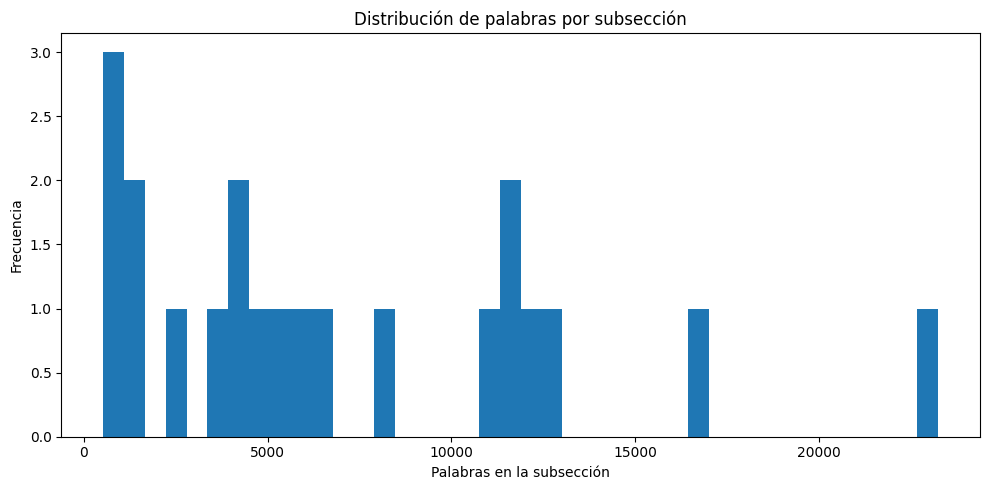

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df["n_palabras"], bins=40)
plt.title("Distribución de palabras por subsección")
plt.xlabel("Palabras en la subsección")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

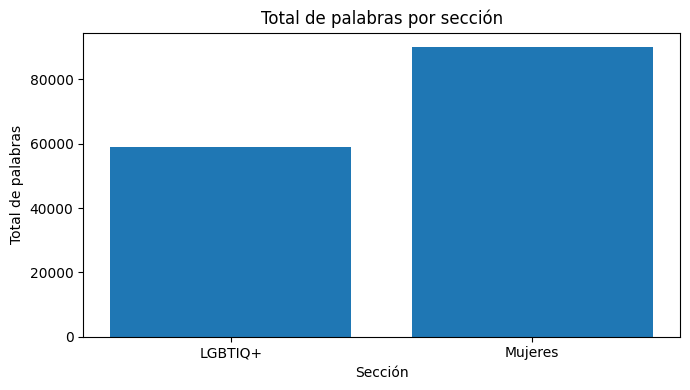

,seccion,n_palabras
0,LGBTIQ+,59017
1,Mujeres,90010


In [ ]:
agg_top = df.groupby("seccion", as_index=False)["n_palabras"].sum()

plt.figure(figsize=(7, 4))
plt.bar(agg_top["seccion"], agg_top["n_palabras"])
plt.title("Total de palabras por sección")
plt.xlabel("Sección")
plt.ylabel("Total de palabras")
plt.tight_layout()
plt.show()

agg_top


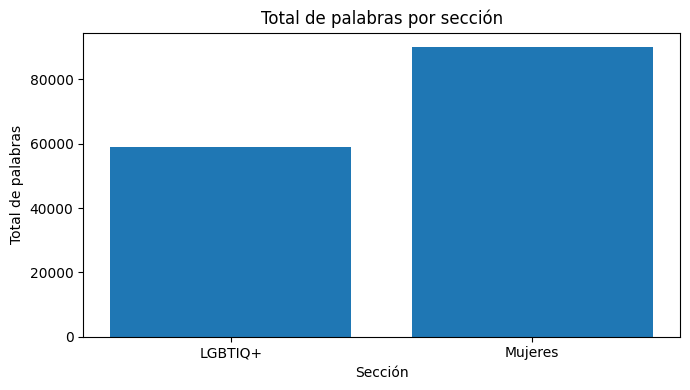

,seccion,n_palabras
0,LGBTIQ+,59017
1,Mujeres,90010


In [ ]:
agg_top = df.groupby("seccion", as_index=False)["n_palabras"].sum()

plt.figure(figsize=(7, 4))
plt.bar(agg_top["seccion"], agg_top["n_palabras"])
plt.title("Total de palabras por sección")
plt.xlabel("Sección")
plt.ylabel("Total de palabras")
plt.tight_layout()
plt.show()

agg_top


/tmp/ipython-input-673514829.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


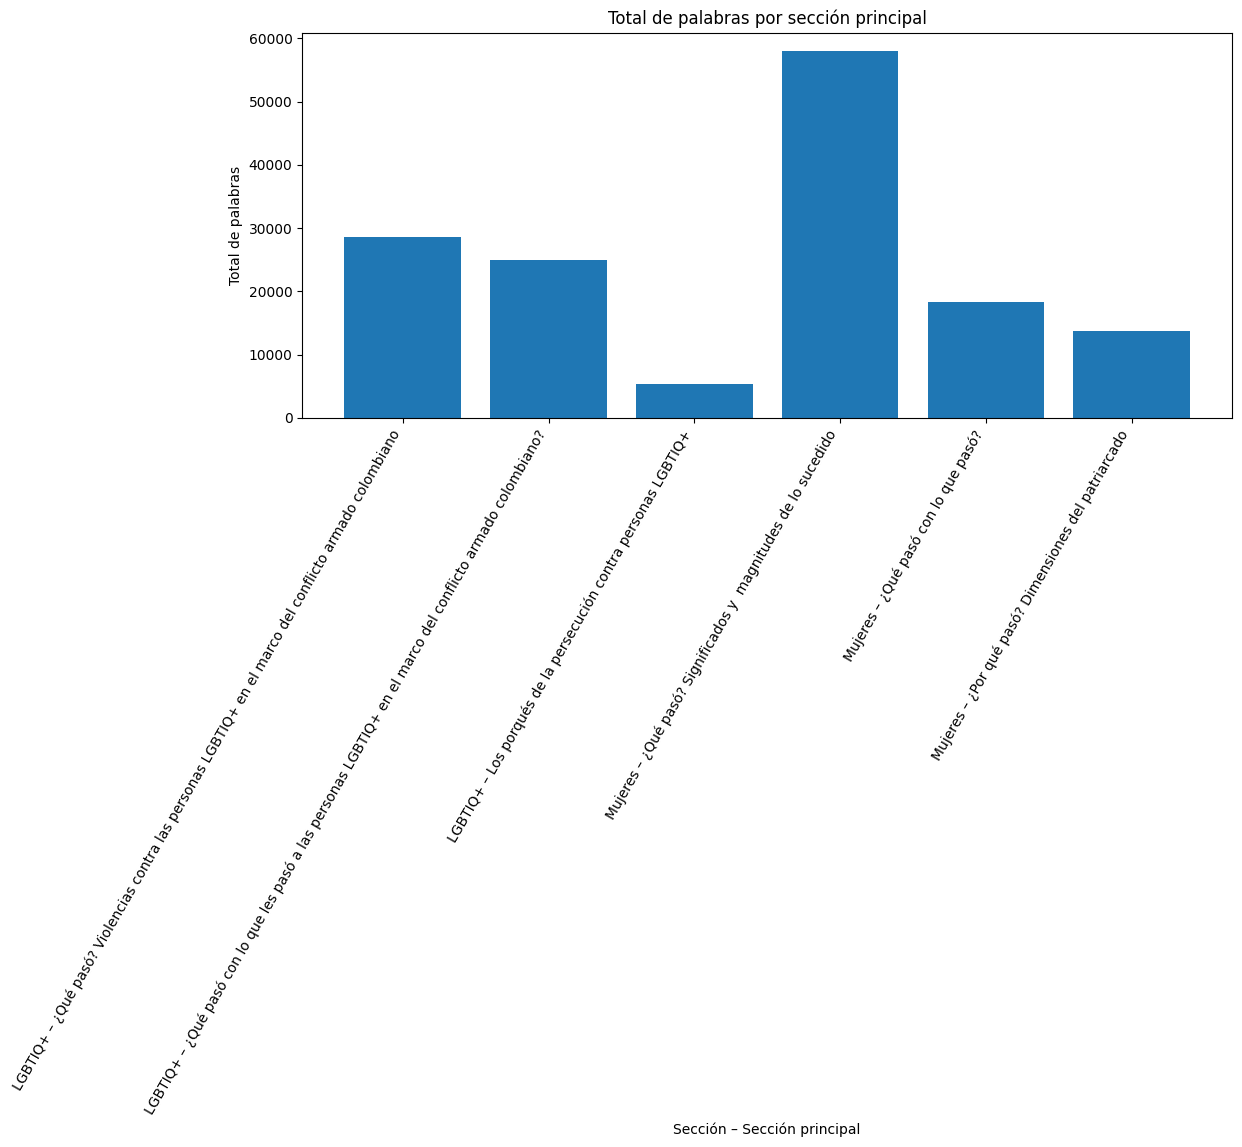

,seccion,seccion_principal,n_palabras,etiqueta
2,LGBTIQ+,¿Qué pasó? Violencias contra las personas LGBT...,28638,LGBTIQ+ – ¿Qué pasó? Violencias contra las per...
1,LGBTIQ+,¿Qué pasó con lo que les pasó a las personas L...,24994,LGBTIQ+ – ¿Qué pasó con lo que les pasó a las ...
0,LGBTIQ+,Los porqués de la persecución contra personas ...,5385,LGBTIQ+ – Los porqués de la persecución contra...
5,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,57976,Mujeres – ¿Qué pasó? Significados y magnitude...
4,Mujeres,¿Qué pasó con lo que pasó?,18238,Mujeres – ¿Qué pasó con lo que pasó?
3,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,13796,Mujeres – ¿Por qué pasó? Dimensiones del patri...


In [ ]:
agg_lvl2 = (
    df.groupby(["seccion", "seccion_principal"], as_index=False)["n_palabras"].sum()
    .sort_values(["seccion", "n_palabras"], ascending=[True, False])
)

# Etiqueta combinada para el gráfico
agg_lvl2["etiqueta"] = agg_lvl2["seccion"] + " – " + agg_lvl2["seccion_principal"]

plt.figure(figsize=(12, 5))
plt.bar(agg_lvl2["etiqueta"], agg_lvl2["n_palabras"])
plt.title("Total de palabras por sección principal")
plt.xlabel("Sección – Sección principal")
plt.ylabel("Total de palabras")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

agg_lvl2.head(10)


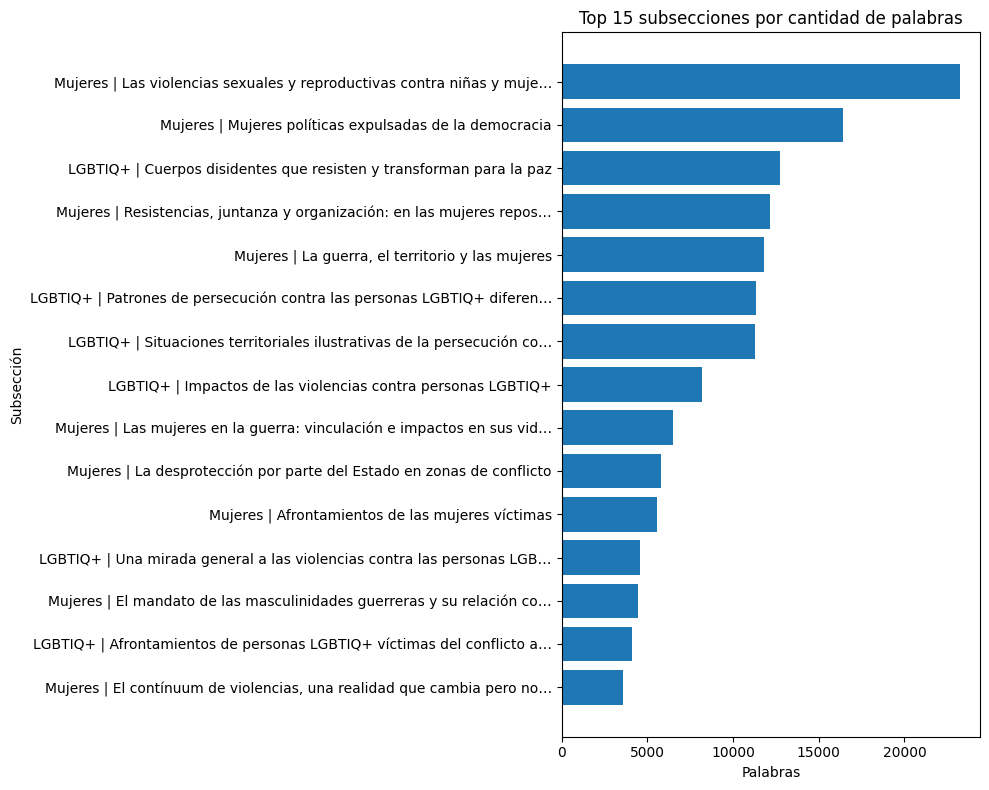

,seccion,seccion_principal,subseccion,n_palabras,label
1,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las violencias sexuales y reproductivas contra...,23246,Mujeres | Las violencias sexuales y reproducti...
2,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Mujeres políticas expulsadas de la democracia,16429,Mujeres | Mujeres políticas expulsadas de la d...
20,LGBTIQ+,¿Qué pasó con lo que les pasó a las personas L...,Cuerpos disidentes que resisten y transforman ...,12731,LGBTIQ+ | Cuerpos disidentes que resisten y tr...
9,Mujeres,¿Qué pasó con lo que pasó?,"Resistencias, juntanza y organización: en las ...",12156,"Mujeres | Resistencias, juntanza y organizació..."
0,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,"La guerra, el territorio y las mujeres",11810,"Mujeres | La guerra, el territorio y las mujeres"
13,LGBTIQ+,¿Qué pasó? Violencias contra las personas LGBT...,Patrones de persecución contra las personas LG...,11350,LGBTIQ+ | Patrones de persecución contra las p...
11,LGBTIQ+,¿Qué pasó? Violencias contra las personas LGBT...,Situaciones territoriales ilustrativas de la p...,11303,LGBTIQ+ | Situaciones territoriales ilustrativ...
18,LGBTIQ+,¿Qué pasó con lo que les pasó a las personas L...,Impactos de las violencias contra personas LGB...,8178,LGBTIQ+ | Impactos de las violencias contra pe...
3,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las mujeres en la guerra: vinculación e impact...,6491,Mujeres | Las mujeres en la guerra: vinculació...
6,Mujeres,¿Por qué pasó? Dimensiones del patriarcado,La desprotección por parte del Estado en zonas...,5787,Mujeres | La desprotección por parte del Estad...


In [ ]:
topN = 15
top_subs = df.nlargest(topN, "n_palabras")[["seccion", "seccion_principal", "subseccion", "n_palabras"]].copy()

# Etiqueta corta para el eje Y
def cortar(s, n=60):
    s = str(s)
    return s if len(s) <= n else s[:n-1] + "…"

top_subs["label"] = top_subs.apply(
    lambda r: f"{r['seccion']} | {cortar(r['subseccion'])}", axis=1
)

plt.figure(figsize=(10, 8))
plt.barh(top_subs["label"][::-1], top_subs["n_palabras"][::-1])
plt.title(f"Top {topN} subsecciones por cantidad de palabras")
plt.xlabel("Palabras")
plt.ylabel("Subsección")
plt.tight_layout()
plt.show()

top_subs


## Frecuencias de palabras

### Dependencias y funciones

In [ ]:
# -*- coding: utf-8 -*-
import re
import unicodedata
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import ToktokTokenizer

# --- Descargas seguras (por si faltan recursos) ---
try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")

try:
    nltk.data.find("corpora/stopwords")
except LookupError:
    nltk.download("stopwords")

# 'punkt_tab' es opcional en algunas versiones de NLTK
try:
    nltk.download("punkt_tab")
except Exception:
    pass

# --- Configuración ---
SPANISH_STOPS = set(stopwords.words("spanish"))
tokenizer = ToktokTokenizer()   # tokenizer robusto y agnóstico de idioma

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def strip_accents(text: str) -> str:
    """(Opcional) normaliza tildes para unificar 'mujer' y 'mujér'."""
    text = unicodedata.normalize("NFKD", text)
    return "".join(ch for ch in text if not unicodedata.combining(ch))

def tokenize_es(texto: str, lower=True, remove_accents=False):
    """Tokeniza texto español con Toktok; filtra puntación básica."""
    if not isinstance(texto, str):
        return []
    t = texto
    if lower:
        t = t.lower()
    if remove_accents:
        t = strip_accents(t)
    tokens = tokenizer.tokenize(t)
    # nos quedamos con tokens "de palabra" (incluye ñ/acentos si no los quitaste)
    tokens = [tok for tok in tokens if re.search(r"\w", tok)]
    return tokens

def limpiar_tokens(tokens, usar_stopwords=False, min_len=3, quitar_numeros=True):
    out = []
    for tok in tokens:
        if quitar_numeros and tok.isdigit():
            continue
        if usar_stopwords and tok in SPANISH_STOPS:
            continue
        if len(tok) < min_len:
            continue
        # dejar solo tokens alfabéticos (permite guiones/apóstrofes si quieres quitar, cámbialo)
        if not re.fullmatch(r"[0-9A-Za-zÁÉÍÓÚÜÑáéíóúüñ]+", tok):
            # si quieres permitir más símbolos diacríticos, ajusta la regex
            # por ahora, descarta tokens con mucha puntuación
            continue
        out.append(tok)
    return out



### Con Stopwords

In [ ]:
# ================= 1) VOCABULARIO GLOBAL =================
#   Cambia remove_accents=True si quieres fusionar tildes.
all_tokens = []
for txt in df["contenido"].fillna(""):
    toks = tokenize_es(txt, lower=True, remove_accents=False)
    toks = limpiar_tokens(toks, usar_stopwords=False, min_len=1, quitar_numeros=True)
    all_tokens.extend(toks)

fdist = FreqDist(all_tokens)  # distribución de frecuencias (NLTK)
vocab_nltk = pd.DataFrame(fdist.most_common(), columns=["palabra", "frecuencia"])
print("Vocabulario (con stopwords, len>=1):", len(vocab_nltk))
vocab_nltk.head(20)



Vocabulario (con stopwords, len>=1): 13420


,palabra,frecuencia
0,de,8627
1,la,6052
2,y,4931
3,que,4128
4,en,3858
5,a,3571
6,el,3205
7,las,3128
8,los,2307
9,por,1686


In [ ]:
# ================= 2) VOCAB POR GRUPO (seccion) =================
def top_vocab_por_grupo(df, group_col, topn=30, remove_accents=False):
    resultados = {}
    for g, sub in df.groupby(group_col):
        toks_g = []
        for txt in sub["contenido"].fillna(""):
            t = tokenize_es(txt, lower=True, remove_accents=remove_accents)
            t = limpiar_tokens(t, usar_stopwords=False, min_len=1, quitar_numeros=True)
            toks_g.extend(t)
        fd = FreqDist(toks_g)
        resultados[g] = pd.DataFrame(fd.most_common(topn), columns=["palabra", "frecuencia"])
    return resultados

In [ ]:
top_seccion = top_vocab_por_grupo(df, "seccion", topn=30, remove_accents=False)
top_principal = top_vocab_por_grupo(df, "seccion_principal", topn=30, remove_accents=False)

# Ejemplos de inspección:
print(top_seccion.get("Mujeres", pd.DataFrame()).head(15))
print(top_principal.get("¿Qué pasó? Significados y  magnitudes de lo sucedido", pd.DataFrame()).head(15))

    palabra  frecuencia
0        de        5525
1        la        4000
2         y        3171
3       que        2410
4        en        2396
5         a        2101
6        el        2041
7       las        2018
8       los        1431
9       por         989
10       se         909
11  mujeres         821
12      del         813
13       no         812
14      con         746
   palabra  frecuencia
0       de        3492
1       la        2454
2        y        2015
3      que        1563
4       en        1479
5        a        1392
6       el        1287
7      las        1274
8      los         956
9      por         629
10      se         583
11      no         562
12     del         506
13     con         480
14      me         464


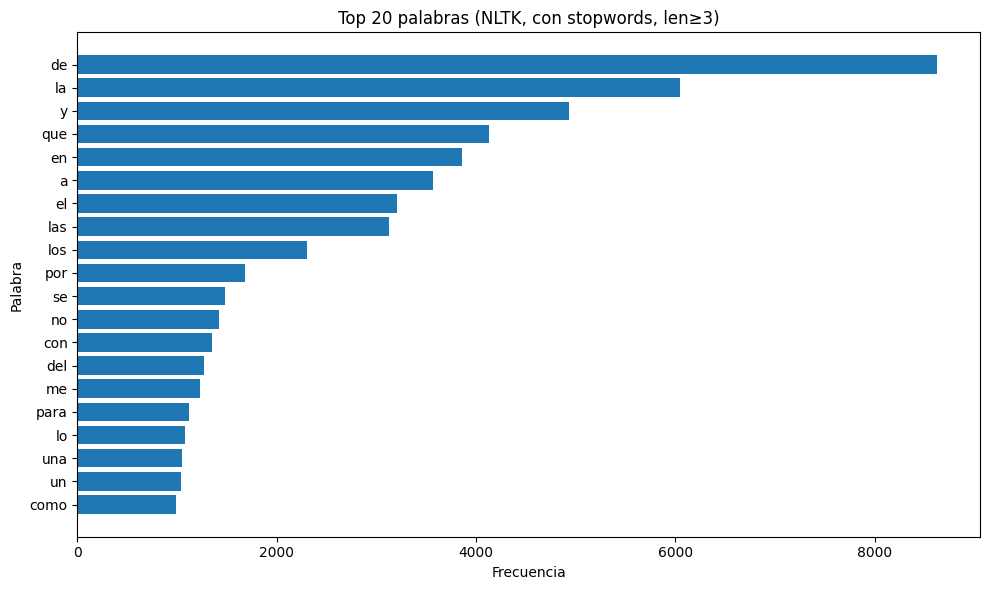

In [ ]:
# ================= 3) GRÁFICO: Top-20 global =================
topN = 20
top_global = vocab_nltk.head(topN)

plt.figure(figsize=(10, 6))
plt.barh(top_global["palabra"][::-1], top_global["frecuencia"][::-1])
plt.title(f"Top {topN} palabras (NLTK, con stopwords, len≥3)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()

### Sin Stopwords

In [ ]:
# ================= 1) VOCABULARIO GLOBAL =================
#   Cambia remove_accents=True si quieres fusionar tildes.
all_tokens = []
for txt in df["contenido"].fillna(""):
    toks = tokenize_es(txt, lower=True, remove_accents=False)
    toks = limpiar_tokens(toks, usar_stopwords=True, min_len=3, quitar_numeros=True)
    all_tokens.extend(toks)

fdist = FreqDist(all_tokens)  # distribución de frecuencias (NLTK)
vocab_nltk = pd.DataFrame(fdist.most_common(), columns=["palabra", "frecuencia"])
print("Vocabulario (sin stopwords, len>=3):", len(vocab_nltk))
vocab_nltk.head(20)

Vocabulario (sin stopwords, len>=3): 13170


,palabra,frecuencia
0,mujeres,928
1,mujer,484
2,personas,420
3,entrevista,348
4,así,300
5,comisión,291
6,vida,289
7,violencia,289
8,ser,287
9,cuerpo,285


In [ ]:
# ================= 2) VOCAB POR GRUPO (seccion) =================
def top_vocab_por_grupo(df, group_col, topn=30, remove_accents=False):
    resultados = {}
    for g, sub in df.groupby(group_col):
        toks_g = []
        for txt in sub["contenido"].fillna(""):
            t = tokenize_es(txt, lower=True, remove_accents=remove_accents)
            t = limpiar_tokens(t, usar_stopwords=True, min_len=3, quitar_numeros=True)
            toks_g.extend(t)
        fd = FreqDist(toks_g)
        resultados[g] = pd.DataFrame(fd.most_common(topn), columns=["palabra", "frecuencia"])
    return resultados

In [ ]:
top_seccion = top_vocab_por_grupo(df, "seccion", topn=30, remove_accents=False)
top_principal = top_vocab_por_grupo(df, "seccion_principal", topn=30, remove_accents=False)

# Ejemplos de inspección:
print(top_seccion.get("Mujeres", pd.DataFrame()).head(15))
print(top_principal.get("¿Qué pasó? Significados y  magnitudes de lo sucedido", pd.DataFrame()).head(15))

       palabra  frecuencia
0      mujeres         821
1        mujer         303
2         vida         202
3    violencia         191
4          así         190
5   entrevista         181
6     comisión         166
7        parte         164
8       cuerpo         145
9          ser         143
10        pasó         138
11  violencias         136
12    entonces         132
13    víctimas         127
14   conflicto         126
       palabra  frecuencia
0      mujeres         441
1        mujer         202
2   entrevista         134
3         vida         127
4          así         125
5     comisión         112
6    violencia         110
7        parte         101
8   violencias          96
9       cuerpo          94
10    entonces          90
11         ahí          85
12        pasó          83
13         ser          80
14        años          79


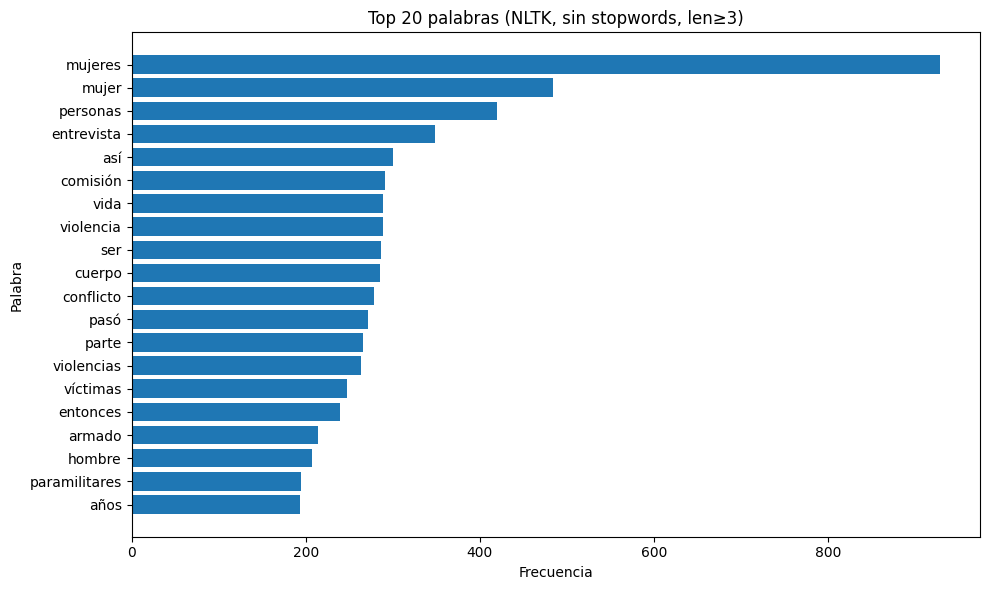

In [ ]:
# ================= 3) GRÁFICO: Top-20 global =================
topN = 20
top_global = vocab_nltk.head(topN)

plt.figure(figsize=(10, 6))
plt.barh(top_global["palabra"][::-1], top_global["frecuencia"][::-1])
plt.title(f"Top {topN} palabras (NLTK, sin stopwords, len≥3)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()